In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.float_format', str)

In [8]:
df = pd.read_pickle('data_Han/Han_df_cleaned')

# Baseline Model

In [46]:
col_selector = ['price','sqft_living','grade','view','bedrooms','bathrooms']
df_base = df[col_selector]

In [47]:
y = df_base.price
X = df_base.drop(columns = ['price'])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [63]:
ss = StandardScaler()
X_trans_train = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_trans_test = ss.transform(X_test)

In [64]:
X_trans_train

,sqft_living,grade,view,bedrooms,bathrooms
0,-0.5432786012312726,-0.5669289199608938,-0.3062582903778073,-0.414287468541929,-0.8099759682239117
1,1.6950450899150187,1.9964602574216077,-0.3062582903778073,0.6965290731303558,0.8300024293064082
2,-1.0394587298104998,-1.4213919790883942,-0.3062582903778073,-0.414287468541929,-1.4659673272360396
3,0.30574072989318274,0.28753413916660675,-0.3062582903778073,-0.414287468541929,0.5020067498003443
4,-0.5873835015494261,-0.5669289199608938,-0.3062582903778073,0.6965290731303558,1.1579981088124722
...,...,...,...,...,...
15112,1.7170975400740955,1.9964602574216077,-0.3062582903778073,1.8073456148026408,1.1579981088124722
15113,-0.69764575234481,-0.5669289199608938,-0.3062582903778073,-0.414287468541929,-0.4819802887178477
15114,-1.5025601831511117,-1.4213919790883942,-0.3062582903778073,-2.6359205518864988,-1.4659673272360396
15115,-0.4219901253563504,-0.5669289199608938,-0.3062582903778073,-0.414287468541929,-0.8099759682239117


In [66]:
model = sm.OLS(y_test, sm.add_constant(X_trans_train))
results = model.fit()

print(results.summary())

ValueError: The indices for endog and exog are not aligned

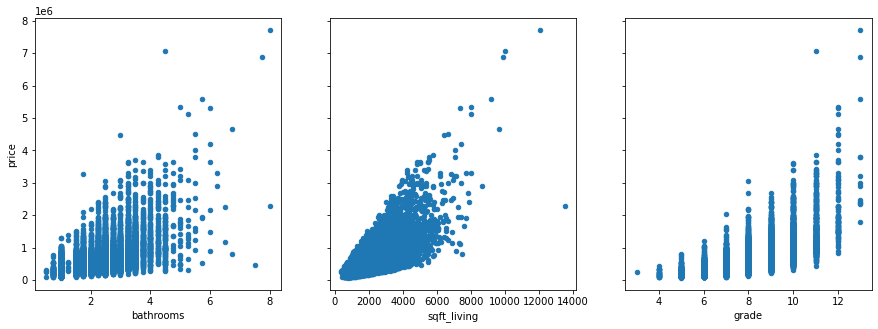

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5), sharey=True)
ax1.set_ylabel("price")

df_base.plot.scatter(x="bathrooms", y="price", ax=ax1)
df_base.plot.scatter(x="sqft_living", y="price", ax=ax2)
df_base.plot.scatter(x="grade", y="price", ax=ax3);